Датасэт о рекламах.

Перед вами данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней. И таблица с характеристиками рекламных клиентов (те, кто разместил эти объявления).

ads_data.csv – данные взаимодействий с рекламными объявлениями
date – дата
time – время
event – действие (просмотр/клик)
platform – платформа
ad_id – id объявления
client_union_id – id рекламного кабинета
campaign_union_id – id рекламной кампании
ad_cost_type – тип оплаты
ad_cost – цена
has_video – есть ли видео
target_audience_count – размер аудитории

ads_clients_data.csv – характеристики рекламных клиентов
date – дата
client_union_id – id рекламного кабинета
community_id – id сообщества
create_date – дата создания рекламного клиента

Разберемся с распределением количества показов и кликов. Посчитаем среднее количество показов и среднее количество кликов на объявления за весь период.
Нарисуем график распределения показов на объявление за весь период.
А теперь посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года?

Скользящее среднее часто используется для поиска аномалий в данных. Попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. 

Напишим функцию, которая найдет проблемное объявление (с наибольшим/наименишим количеством показов) в день, в который была замечена самая большая по модулю аномалия. 

Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.

Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. Ответ в процентах и округлить до сотых.

Разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. Определим, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).
Выведем на график эти категории с количеством уникальных клиентов в них.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Загрузка и предобработка данных:

In [2]:
ads_data = pd.read_csv('ads_data.csv')
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [3]:
ads_data.shape

(1000000, 11)

In [4]:
ads_clients = pd.read_csv('ads_clients_data.csv')
ads_clients.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [5]:
ads_clients.shape

(122078, 4)

# 1
Разберемся с распределением количества показов и кликов. Посчитаем среднее количество показов и среднее количество кликов на объявления за весь период (округлим до целых).

In [6]:
number_event = ads_data.groupby(['ad_id', 'event'], as_index=False) \
        .agg({'time': 'count'}) \
        .rename(columns={'time': 'event_number'})

In [7]:
number_event.head()

,ad_id,event,event_number
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1


In [8]:
pivot_event = number_event.pivot(index='ad_id', 
                   columns='event', 
                   values='event_number') \
            .fillna(0)

In [9]:
pivot_event.head()

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0


In [10]:
pivot_event.mean().round()

event
click    113.0
view     923.0
dtype: float64

#### 2-ой способ

In [11]:
number_event.groupby('event') \
            .agg({'event_number': 'sum'}) \
            .div(ads_data.ad_id.nunique()) \
            .round()

,event_number
event,
click,113.0
view,923.0


# 2
Нарисуем график распределения показов на объявление за весь период

In [12]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [13]:
views_per_ad = number_event.query('event == "view"')

D:\Victor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='event_number', ylabel='Density'>

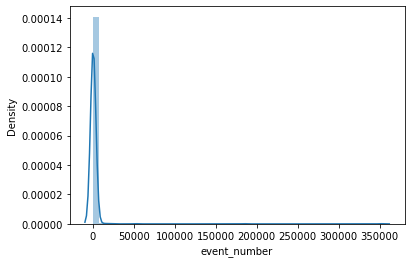

In [14]:
sns.distplot(views_per_ad.event_number)

In [15]:
views_per_ad.event_number.describe()

count       956.000000
mean        931.822176
std       13006.492754
min          10.000000
25%          36.000000
50%          84.000000
75%         209.250000
max      351802.000000
Name: event_number, dtype: float64

In [16]:
np.log(views_per_ad.event_number)

1       4.615121
3       5.214936
5       3.713572
6       3.555348
8       4.060443
          ...   
1475    4.605170
1476    5.049856
1477    4.219508
1479    4.927254
1480    3.737670
Name: event_number, Length: 956, dtype: float64

In [17]:
views_per_ad['log_views'] = np.log(views_per_ad.event_number)

<ipython-input-17-dcc8824d8fc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  views_per_ad['log_views'] = np.log(views_per_ad.event_number)


In [18]:
views_per_ad.log_views.describe()

count    956.000000
mean       4.597903
std        1.330069
min        2.302585
25%        3.583519
50%        4.430817
75%        5.343528
max       12.770824
Name: log_views, dtype: float64

In [19]:
# задаем параметры для графика
sns.set(
        font_scale=2, # размер шрифтов
        style='whitegrid', # естьли рештка цвет фона, белый цвет и решетка присутсвует
        rc={'figure.figsize': (20, 7)}) # параметры  для размера графика 

D:\Victor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_views', ylabel='Density'>

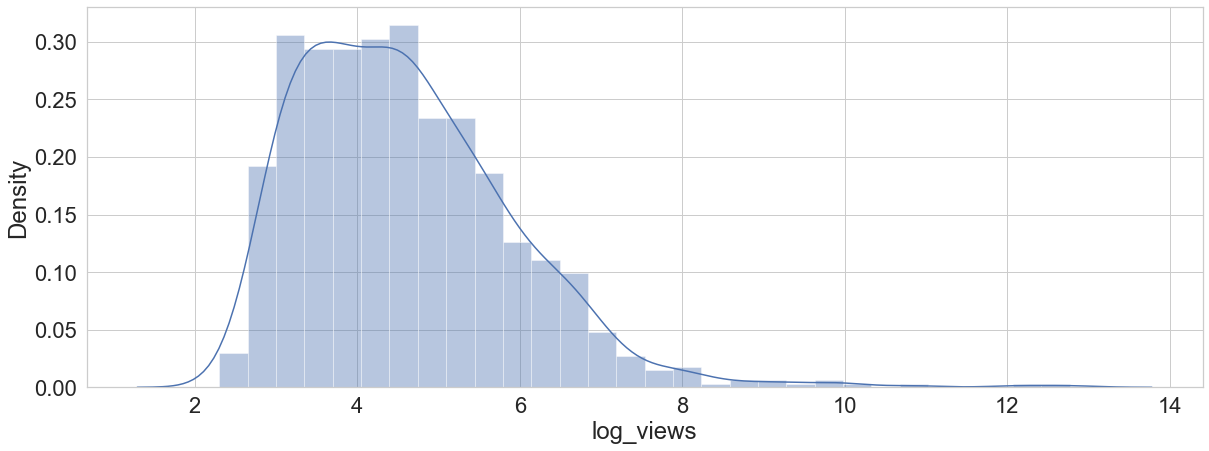

In [20]:
sns.distplot(views_per_ad.log_views)

# 3
Теперь давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлим до целых)?

In [21]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [22]:
ads_views_per_date = ads_data.query('event == "view"') \
                             .pivot_table(index='ad_id',
                                         columns='date',
                                         values='time',
                                         aggfunc='count')

In [23]:
ads_views_per_date.head()

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN


In [24]:
mean_views = ads_views_per_date.mean()
mean_views

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [25]:
rolling_views = mean_views.rolling(2).mean()
rolling_views

date
2019-04-01           NaN
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
2019-04-06    598.116202
dtype: float64

In [26]:
rolling_views['2019-04-06'].round()

598.0

# 4
Скользящее среднее часто используется для поиска аномалий в данных. Нанесем на один график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем.

<AxesSubplot:xlabel='date'>

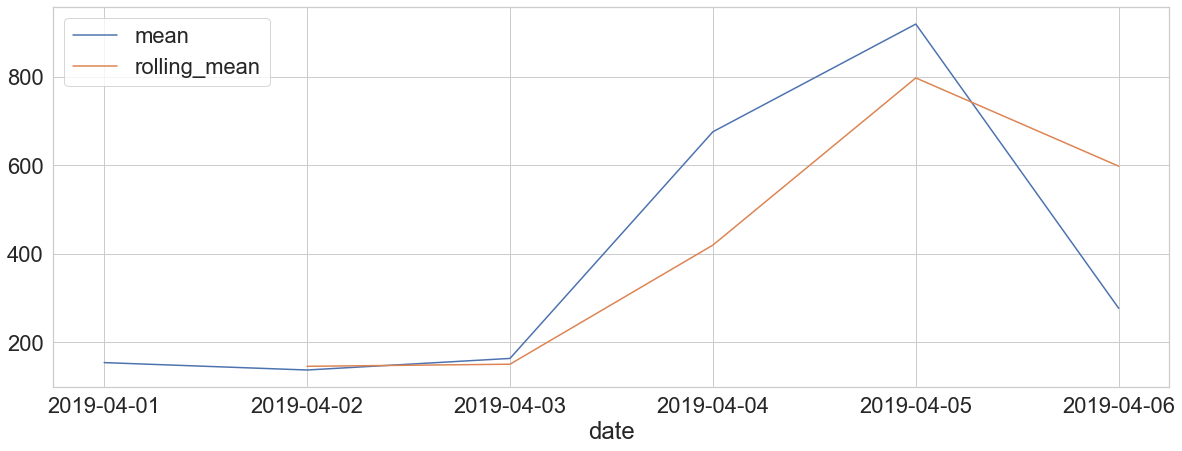

In [27]:
sns.lineplot(data=mean_views, label='mean')
sns.lineplot(data=rolling_views, label='rolling_mean')

In [28]:
(mean_views - rolling_views).abs() # abs это модуль, убираем минусы

date
2019-04-01           NaN
2019-04-02      8.347644
2019-04-03     13.082898
2019-04-04    255.974471
2019-04-05    121.603979
2019-04-06    320.993475
dtype: float64

In [29]:
(mean_views - rolling_views).abs().idxmax()

'2019-04-06'

# 5
Напишим функцию, которая найдет проблемное объявление (с наибольшим/наименишим количеством показов) в день, в который была замечена самая большая по модулю аномалия.

In [30]:
# Find date with anomaly
(mean_views - rolling_views).abs().idxmax()

'2019-04-06'

In [32]:
anomaly_day = mean_views.subtract(rolling_views) \
                        .abs() \
                        .idxmax()

In [33]:
anomaly_day

'2019-04-06'

In [40]:
difference_value = mean_views.subtract(rolling_views)[anomaly_day]

# Find maximum view ad
if difference_value <= 0:
    anomaly_ad = ads_views_per_date[anomaly_day].idxmax()
# Find minimum view ad    
else:
    anomaly_ad = ads_views_per_date[anomaly_day].idxmin()

In [41]:
difference_value

-320.9934750733138

In [43]:
anomaly_ad

112583

In [39]:
ads_views_per_date['2019-04-06'].sort_values(ascending=False)

ad_id
112583    48991.0
28142      3280.0
38892      1337.0
37720       835.0
18425       426.0
           ...   
121964        NaN
122004        NaN
122013        NaN
122023        NaN
122078        NaN
Name: 2019-04-06, Length: 956, dtype: float64

In [44]:
# Создаем функцию

In [47]:
def find_anomaly_id(ad_view_per_day_per_add):
    # Find anomaly day
    # Average for each date
    mean_views = ad_view_per_day_per_add.mean()
    
    # Find date with anomaly, requre mean_views
    mean_difference = mean_views.subtract(rolling_views)
    anomaly_day = mean_difference \
                            .abs() \
                            .idxmax()
    # Find sign
    difference_value = mean_difference[anomaly_day]
    
    # Find maximum view ad
    if difference_value <= 0:
        anomaly_ad = ads_views_per_date[anomaly_day].idxmax()
    # Find minimum view ad    
    else:
        anomaly_ad = ads_views_per_date[anomaly_day].idxmin()
    
    return anomaly_ad

In [50]:
find_anomaly_id(ads_views_per_date)

112583

# 6 
Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.

In [55]:
full_data = ads_data.merge(ads_clients.drop(columns=['date', 'community_id']))
full_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04


In [62]:
full_data[['date', 'create_date']] = full_data[['date', 'create_date']].apply(pd.to_datetime)

In [65]:
full_data.dtypes

date                     datetime64[ns]
time                             object
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
create_date              datetime64[ns]
dtype: object

In [69]:
full_data \
    .groupby('client_union_id') \
    .apply(lambda group: (group.date - group.create_date).min()) \
    .mean()

Timedelta('124 days 09:04:43.532219570')

# 7 
Вычислим конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. Ответ в процентах и округлен до сотых.

In [72]:
treshhold = pd.to_timedelta(365, unit='d')
treshhold

Timedelta('365 days 00:00:00')

In [73]:
create_diff = full_data \
                .groupby('client_union_id') \
                .apply(lambda group: (group.date - group.create_date).min())

In [75]:
create_difference = create_diff.loc[create_diff < treshhold]

In [76]:
create_difference

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Length: 838, dtype: timedelta64[ns]

In [82]:
ads_clients.client_union_id.nunique()

122078

In [85]:
round(create_difference.shape[0] / ads_clients.client_union_id.nunique() * 100, 2)

0.69

# 8 
Разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]

In [86]:
create_difference

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Length: 838, dtype: timedelta64[ns]

In [87]:
bins = pd.to_timedelta([0, 30, 90, 180, 365], unit='d')

In [88]:
bins

TimedeltaIndex(['0 days', '30 days', '90 days', '180 days', '365 days'], dtype='timedelta64[ns]', freq=None)

In [113]:
dif_cut = pd.cut(create_difference,
       bins=bins,
       labels= ['0-30', '30-90', '90-180', '180-365'])
dif_cut

client_union_id
1         90-180
9         90-180
13         30-90
16        90-180
20         30-90
           ...  
122004     30-90
122013    90-180
122023    90-180
122031    90-180
122078     30-90
Length: 838, dtype: category
Categories (4, object): ['0-30' < '30-90' < '90-180' < '180-365']

In [132]:
dif_cut_value = dif_cut.value_counts()
dif_cut_value

90-180     396
30-90      263
180-365    168
0-30        11
dtype: int64

# 9
А теперь выведем на график эти категории с количеством уникальных клиентов в них.

<AxesSubplot:>

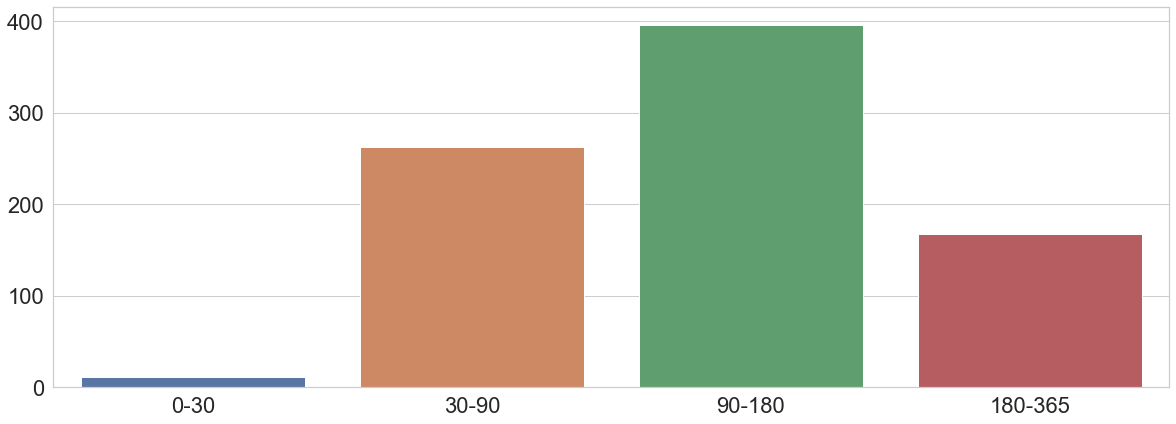

In [136]:
sns.barplot(x=dif_cut_value.index, y=dif_cut_value)

<AxesSubplot:>

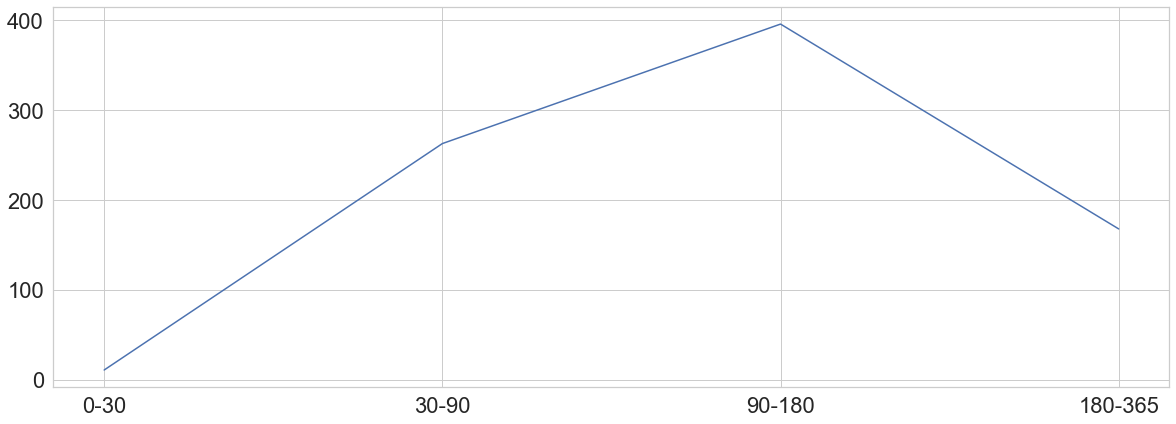

In [111]:
sns.lineplot(data=dif_cut.value_counts())